<a href="https://colab.research.google.com/github/Nuurul101/Orbit-Cosmic--Nuurul-Azizah/blob/main/ML_2_Regresi_Lanjutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2 Regresi Lanjutan

Sebelum mulai:
*   Student yang pakai Colab, silahkan "Save a Copy in Drive" dahulu
*   Student yang pakai Jupyter Notebook, silahkan download code ini dahulu



# Import Library

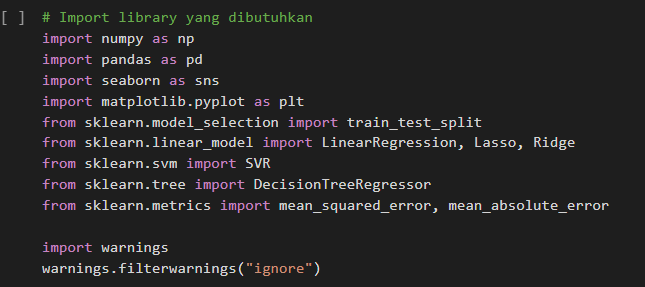

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


# Load Dataset
https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv

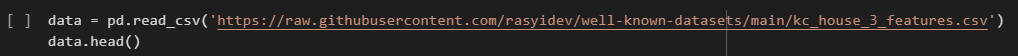

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


Dataset memiliki 3 feature:
- sqft_living
- sqft_living15
- sqft_above

dan sebuah label, yakni price.

# 1. Analisis Korelasi

Lakukan analisis korelasi terhadap dataset.

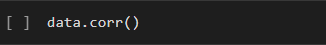

In [3]:
# Analisis korelasi
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


In [4]:
# Periksa informasi terkait dataset (metadata)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    100 non-null    int64  
 1   sqft_living15  100 non-null    int64  
 2   sqft_above     100 non-null    int64  
 3   price          100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


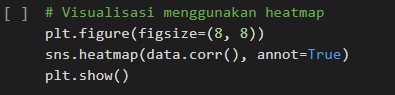

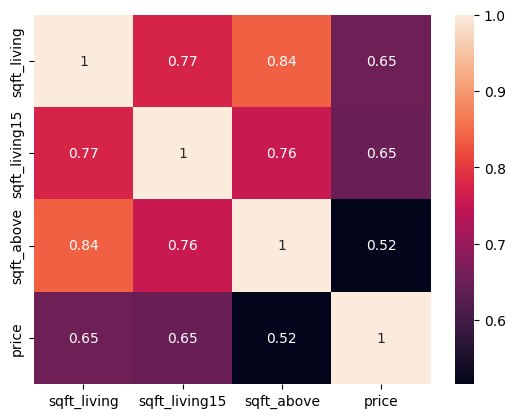

In [5]:
# Visualisasi menggunakan heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

Hasil analisis korelasi menunjukkan bahwa:
- semua feature berkorelasi positif terhadap price
- feature sqft_living dan sqft_living15 memiliki koefisien korelasi tertinggi

# Split Dataset

Split dataset menjadi:
- training data (X_train dan y_train) 80%
- testing data (X_test dan y_test) 20%

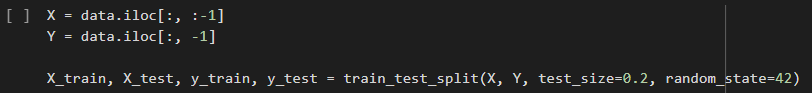

In [6]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

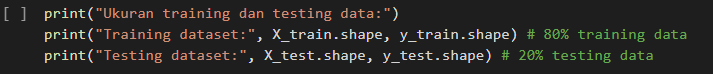

In [7]:
print("Ukuran training dan testing data:")
print("Training dataset:", X_train.shape, y_train.shape)  # 80% traing data
print("Testing dataset:", X_test.shape, y_test.shape)     # 20% testing data

Ukuran training dan testing data:
Training dataset: (80, 3) (80,)
Testing dataset: (20, 3) (20,)


# 2. Modeling

Pada program ini, kita akan melatih lebih dari satu model regresi, antara lain:
- Regresi Linier
- Regresi Lasso
- Regresi Ridge
- Support Vector Regressor (SVR)
- Decision Tree Regressor (DTR)

Latih semua model menggunakan training data (X_train dan y_train)


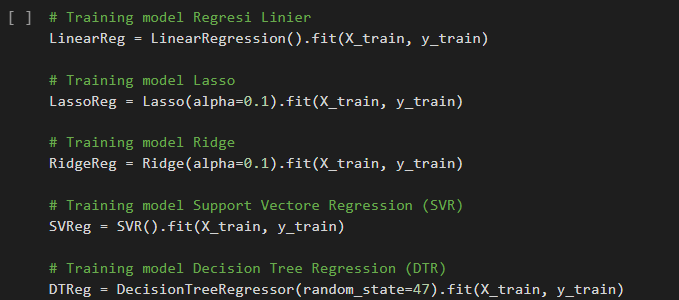

In [8]:
# Training model Regresi Linier
LinearReg = LinearRegression().fit(X_train, y_train)

# Training model Lasso
LassoReg = Lasso(alpha=0.1).fit(X_train, y_train)

# Training model Ridge
RidgeReg = Ridge(alpha=0.1).fit(X_train, y_train)

# Training model Support Vector Regression (SVR)
SVRReg = SVR().fit(X_train, y_train)

# Training model Decision Tree Regression (DTR)
DTRReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train)

**alpha=0.1** dan **random_state=47** disebut sebagai hyperparameter.

Umumnya, setiap algoritma AI memiliki hyperparameter yang bisa kita setel (tuning) sesuai keinginan.

Setelan hyperparameter yang tepat mampu meningkatkan performa model.

Kunjungi dokumentasi library untuk mempelajari tentang hyperparameter:
- [Regresi Linier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regresi Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Regresi Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# 3. Evaluasi Model Menggunakan Metric MSE dan R2

Lakukan evaluasi pada semua model yang telah dilatih. Sebelum itu, kita perlu men-generate hasil prediksi tiap model.

Generate:
- hasil prediksi training data (y pred train)
- hasil prediksi testing data (y pred test)

menggunakan model.

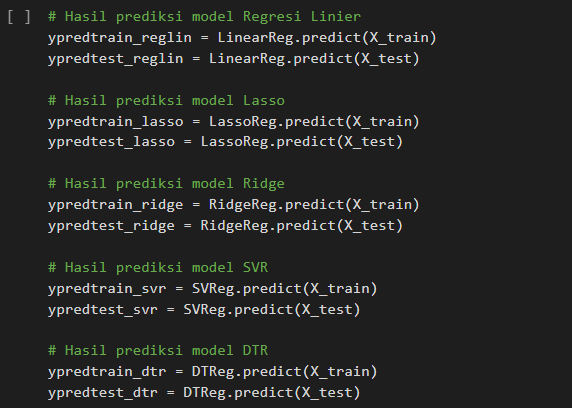

In [9]:
# Hasil prediksi model Regresi Linier
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

# Hasil prediksi model Lasso
ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

# Hasil prediksi model Ridge
ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

# Hasil prediksi model SVR
ypredtrain_svr = SVRReg.predict(X_train)
ypredtest_svr = SVRReg.predict(X_test)

# Hasil prediksi model DTR
ypredtrain_dtr = DTRReg.predict(X_train)
ypredtest_dtr = DTRReg.predict(X_test)

Evaluasi pertama dilakukan menggunakan metric MSE.

Bandingkan:
- label training data (y_train) dengan hasil prediksi training data (y pred train)
- label testing data (y_test) dengan hasil prediksi testing data (y pred test)

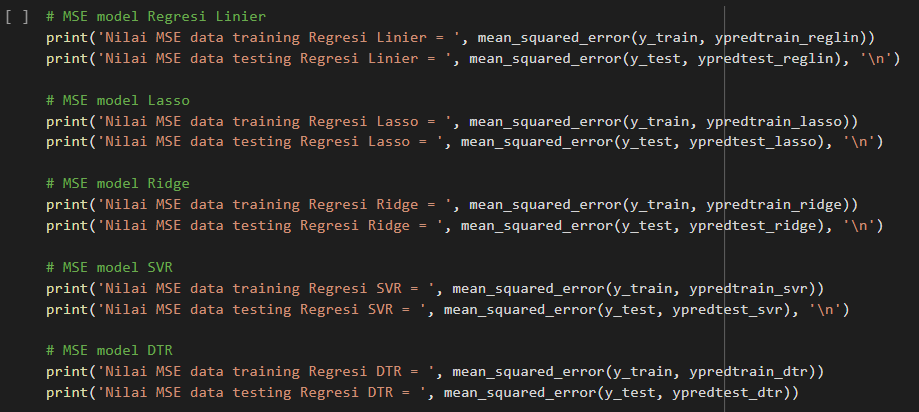

In [10]:
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

# MSE model Lasso
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

# MSE model Ridge
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

# MSE model SVR
print('Nilai MSE data training SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

# MSE model DTR
print('Nilai MSE data training DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')

Nilai MSE data training Regresi Linier =  51040616225.03679
Nilai MSE data testing Regresi Linier =  32881775262.15838 

Nilai MSE data training Regresi Lasso =  51040616225.03679
Nilai MSE data testing Regresi Lasso =  32881775271.07427 

Nilai MSE data training Regresi Ridge =  51040616225.0368
Nilai MSE data testing Regresi Ridge =  32881775254.902454 

Nilai MSE data training SVR =  113673471256.08711
Nilai MSE data testing SVR =  37393496977.231895 

Nilai MSE data training DTR =  455625000.0
Nilai MSE data testing DTR =  40958648000.0 



Hasil evaluasi MSE menunjukkan bahwa:


Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 51040616225.03679 | 32881775262.15838 | -
Regresi Lasso | 51040616225.0368 | 32881775271.07428 | -
Regresi Ridge | 32881775271.07428 | 32881775254.902466 | -
SVR | 113673471256.08711 | 37393496977.231895 | Overfit
DTR | 455625000.0 | 40958648000.0 | Goodfit

Model DTR merupakan model terbaik karena MSE training dan testing tidak jauh berbeda.

> **Note**: Regresi Linier, Lasso, dan Ridge memiliki MSE training yang lebih tinggi dibanding MSE testing. Hal ini bisa terjadi karena data kita berjumlah sedikit. Salah satu solusinya adalah dengan menambah jumlah data dalam dataset.

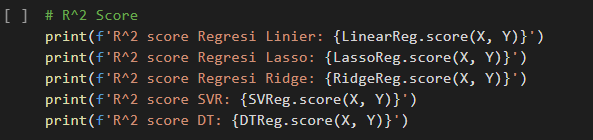

In [11]:
# R^2 Score
print(f'R^2 score Regresi Linier: {LinearReg.score(X_test, y_test)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X_test, y_test)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X_test, y_test)}')
print(f'R^2 score Regresi SVR: {SVRReg.score(X_test, y_test)}')
print(f'R^2 score Regresi Decision Tree: {DTRReg.score(X_test, y_test)}')

R^2 score Regresi Linier: 0.12050591251421439
R^2 score Regresi Lasso: 0.1205059122757397
R^2 score Regresi Ridge: 0.12050591270828981
R^2 score Regresi SVR: -0.00016982780552909915
R^2 score Regresi Decision Tree: -0.09552749084286916


Pilih model dengan R^2 score mendekati 1.

Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

## Visualisasi Hasil Prediksi dengan Data Sebenarnya

Visualisasikan perbandingan antara label testing data (y_test) dengan hasil prediksi testing data (y pred test) pada setiap model.

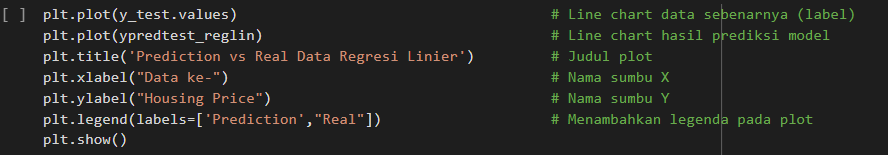

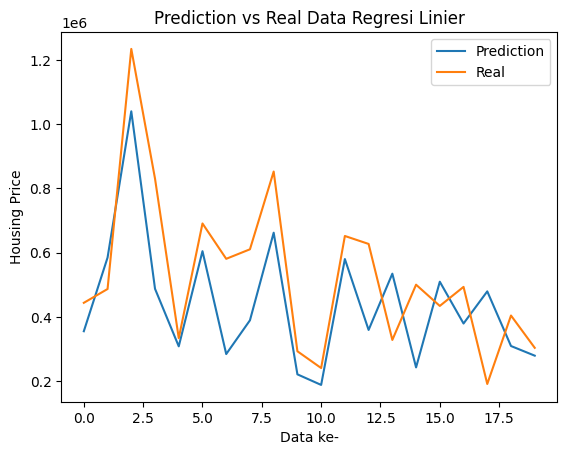

In [12]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_reglin)                            # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Linier')   # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('Housing Price')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

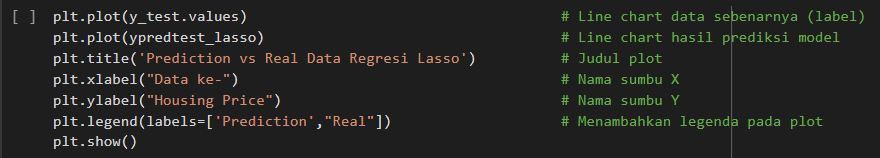

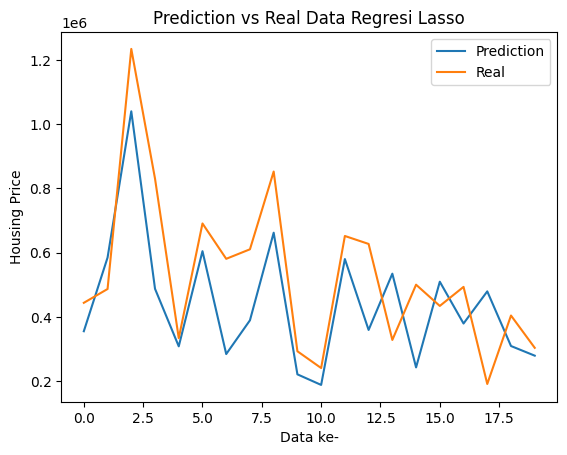

In [13]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_lasso)                             # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Lasso')    # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('Housing Price')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

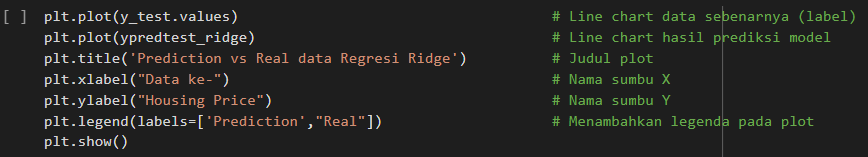

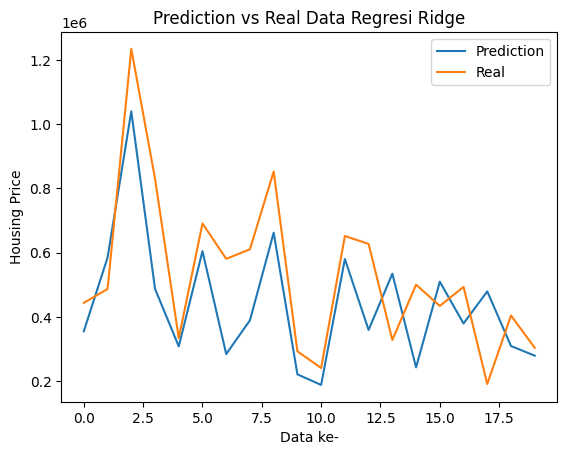

In [14]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_ridge)                             # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Ridge')    # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('Housing Price')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

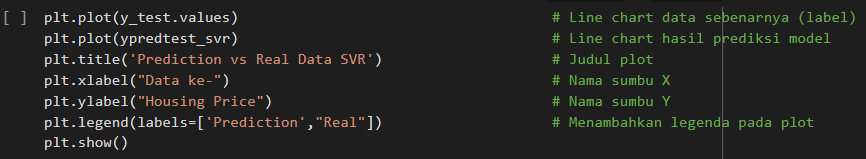

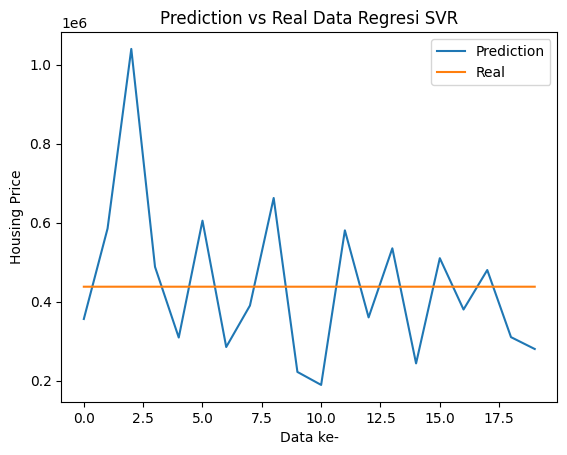

In [15]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_svr)                               # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi SVR')      # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('Housing Price')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

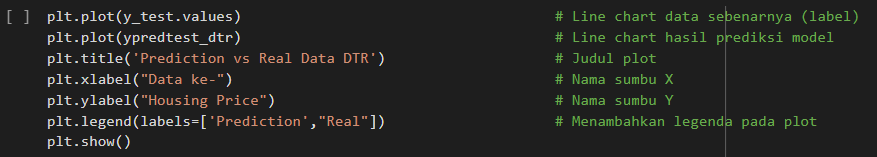

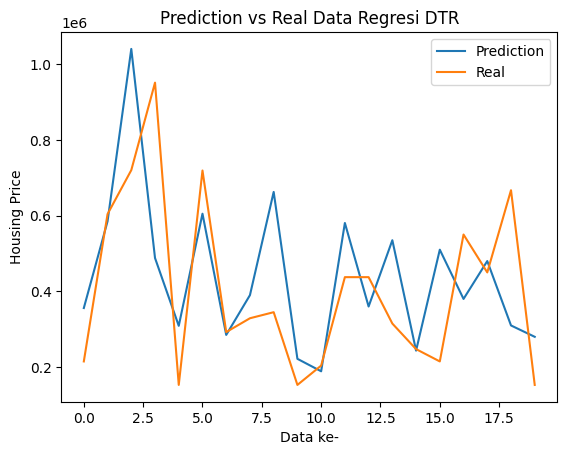

In [16]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_dtr)                               # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi DTR')      # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('Housing Price')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

# Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

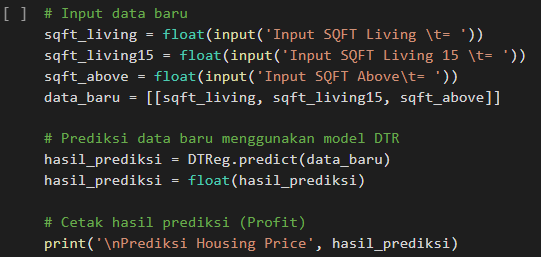

In [18]:
4# Input data baru
sqft_living = float(input('Input SQFT Living \t= '))
sqft_living15 = float(input('Input SQFT Living 15 \t= '))
sqft_above = float(input('Input SQFT Above \t= '))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

# Prediksi data baru menggunakan model DTR
hasil_prediksi = DTRReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print('Hasil Prediksi Harga Rumah = ', hasil_prediksi)

Input SQFT Living 	= 10
Input SQFT Living 15 	= 8
Input SQFT Above 	= 4
Hasil Prediksi Harga Rumah =  450000.0


# Exercise (Latihan)

1. Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

2. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
3. Evaluasi setiap model!
4. Tentukan dan jelaskan model yang paling baik!

In [19]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [21]:
data = pd.read_csv('/content/housing_price.csv')
data.head()

,total_rooms,housing_median_age,population,median_house_value
0,880.0,41.0,322.0,452600.0
1,7099.0,21.0,2401.0,358500.0
2,1467.0,52.0,496.0,352100.0
3,1274.0,52.0,558.0,341300.0
4,1627.0,52.0,565.0,342200.0


#**1. Analisis Korelasi**

In [22]:
#analisis korelasi
data.corr()

,total_rooms,housing_median_age,population,median_house_value
total_rooms,1.000000,-0.033254,0.920196,0.253887
housing_median_age,-0.033254,1.000000,-0.062477,0.018831
population,0.920196,-0.062477,1.000000,0.129279
median_house_value,0.253887,0.018831,0.129279,1.000000


In [23]:
#periksa informasi terkait dataset (metadata)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         100 non-null    float64
 1   housing_median_age  100 non-null    float64
 2   population          100 non-null    float64
 3   median_house_value  100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


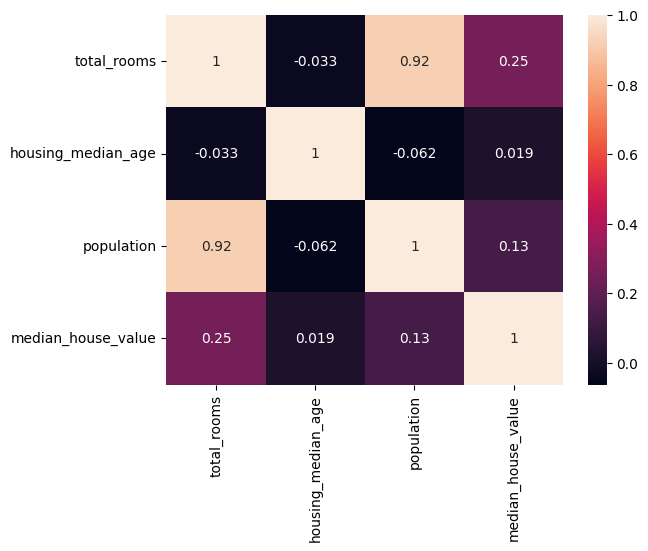

In [24]:
#visualisasi menggunakan heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()

#**Split Dataset**

In [25]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
print("Ukuran training dan testing data : ")
print("Training dataset : ", X_train.shape, y_train.shape)  # 80% traing data
print("Testing dataset : ", X_test.shape, y_test.shape)     # 20% testing data

Ukuran training dan testing data : 
Training dataset :  (80, 3) (80,)
Testing dataset :  (20, 3) (20,)


#**2. Modeling**

In [27]:
# Training model Regresi Linier
LinearReg = LinearRegression().fit(X_train, y_train)

# Training model Lasso
LassoReg = Lasso(alpha=0.1).fit(X_train, y_train)

# Training model Ridge
RidgeReg = Ridge(alpha=0.1).fit(X_train, y_train)

# Training model Support Vector Regression (SVR)
SVRReg = SVR().fit(X_train, y_train)

# Training model Decision Tree Regression (DTR)
DTRReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train)

#**3. Evaluasi Model Menggunakan Metric MSE dan R2**

In [28]:
# Hasil prediksi model Regresi Linier
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

# Hasil prediksi model Lasso
ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

# Hasil prediksi model Ridge
ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

# Hasil prediksi model SVR
ypredtrain_svr = SVRReg.predict(X_train)
ypredtest_svr = SVRReg.predict(X_test)

# Hasil prediksi model DTR
ypredtrain_dtr = DTRReg.predict(X_train)
ypredtest_dtr = DTRReg.predict(X_test)

In [29]:
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

# MSE model Lasso
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

# MSE model Ridge
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

# MSE model SVR
print('Nilai MSE data training SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

# MSE model DTR
print('Nilai MSE data training DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')

Nilai MSE data training Regresi Linier =  4803094063.322078
Nilai MSE data testing Regresi Linier =  8127181805.970065 

Nilai MSE data training Regresi Lasso =  4803094063.322152
Nilai MSE data testing Regresi Lasso =  8127181788.923589 

Nilai MSE data training Regresi Ridge =  4803094063.322078
Nilai MSE data testing Regresi Ridge =  8127181827.757988 

Nilai MSE data training SVR =  5948408542.012653
Nilai MSE data testing SVR =  9903742443.12862 

Nilai MSE data training DTR =  0.0
Nilai MSE data testing DTR =  14219714500.0 



In [30]:
# R^2 Score
print(f'R^2 score Regresi Linier: {LinearReg.score(X_test, y_test)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X_test, y_test)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X_test, y_test)}')
print(f'R^2 score Regresi SVR: {SVRReg.score(X_test, y_test)}')
print(f'R^2 score Regresi Decision Tree: {DTRReg.score(X_test, y_test)}')

R^2 score Regresi Linier: 0.03861247807071533
R^2 score Regresi Lasso: 0.03861248008719165
R^2 score Regresi Ridge: 0.03861247549335978
R^2 score Regresi SVR: -0.17154194806262635
R^2 score Regresi Decision Tree: -0.6820905957406695


#Visualisasi Hasil Prediksi dengan Data Sebenarnya

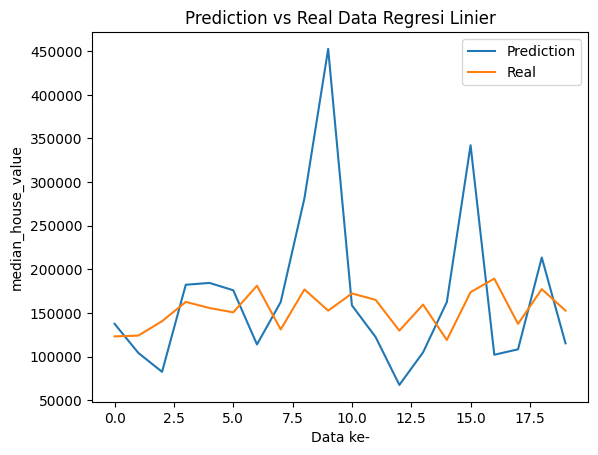

In [31]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_reglin)                            # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Linier')   # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('median_house_value')                      # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

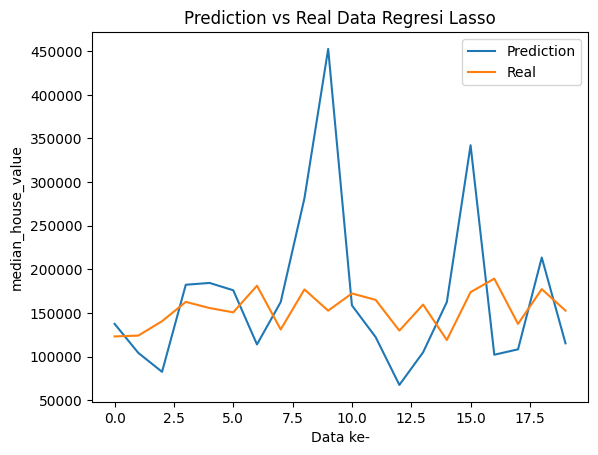

In [32]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_lasso)                             # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Lasso')    # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('median_house_value')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

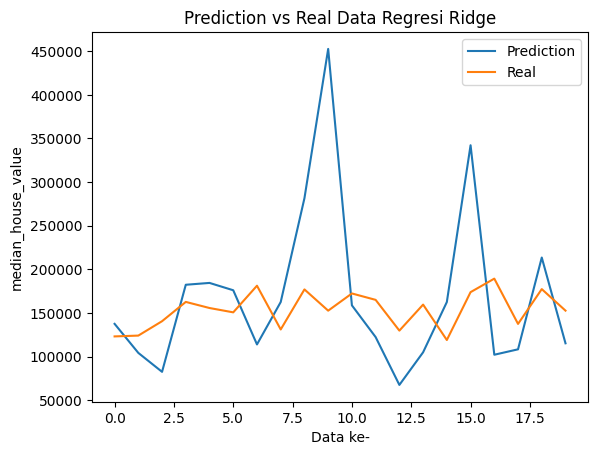

In [33]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_ridge)                             # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Ridge')    # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('median_house_value')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

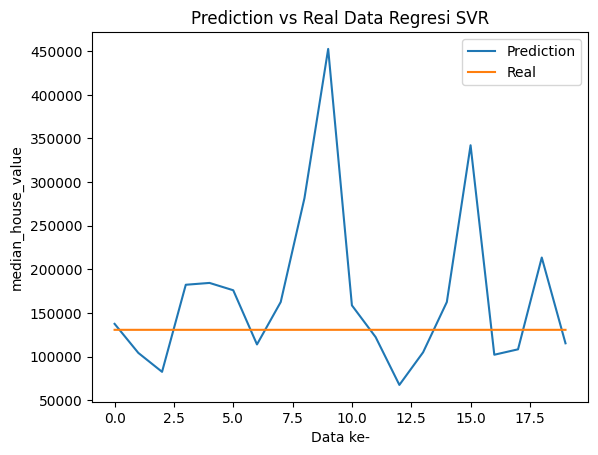

In [34]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_svr)                               # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi SVR')      # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('median_house_value')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

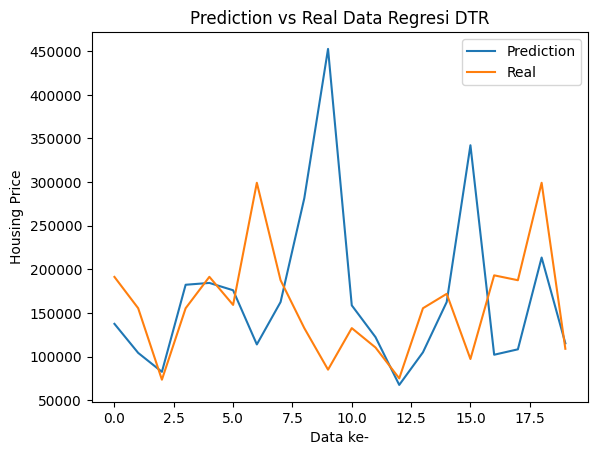

In [35]:
plt.plot(y_test.values)                               # Line chart data sebenarnya (label)
plt.plot(ypredtest_dtr)                               # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi DTR')      # Judul plot
plt.xlabel('Data ke-')                                # Nama sumbu X
plt.ylabel('Housing Price')                           # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])             # Menambahkan legenda pada plot
plt.show()

#**Kesimpulan**

In [37]:
# Input data baru
sqft_living = float(input('Input total_rooms \t\t = '))
sqft_living15 = float(input('Input housing_median_age \t = '))
sqft_above = float(input('Input population \t\t = '))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

# Prediksi data baru menggunakan model DTR
hasil_prediksi = DTRReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print('Hasil Prediksi Harga  = ', hasil_prediksi)

Input total_rooms 		 = 10
Input housing_median_age 	 = 8
Input population 		 = 6
Hasil Prediksi Harga  =  75000.0
